# Example application of ABSURDer to T4L Data

In [1]:
import ABSURDer as absurder
import numpy as np

## Introductory Example

Print class docstrings to see what are the expected inputs.

In [2]:
print( absurder.ABSURDer.__init__.__doc__ )


        Class constructor

        Parameters
        ----------
        rex : str or numpy.ndarray
            path to or numpy ndarray with dimensions nrates*nmethyls containing the experimental rates.
        rmd : str or numpy.ndarray
            path to or numpy ndarray with dimensions nrates*nmethyls*nblocks containing the simulated rates.
        eex : str or numpy.ndarray
            path to or numpy ndarray with dimensions nrates*nmethyls containing the experimental errors.
            If empty, a toy model will be built from rex.
            Default: ''.
        out : str
            path to a pickle file where to store results.
            Default: 'results'.
        thetas : numpy.array
            array of fudge parameters to be used for reweighting.
            Default: np.array([0,100,1000,10000]).
        idx : list
            list of methyls to exclude from the analysis.
            Default: [].
        methyl_list: str
            path to the list of methyl group na

Path to input data. Input datasets are expect to be provided either as a path or as a numpy array of the proper dimension. 

In [3]:
rex = f'data/same_ff/nmr.npy'
rmd = f'data/same_ff/md.npy'

In the case of the synthetic dataset generated from the same force field we build a toy model from the blocks in `rex`, so we don't need to provide any experimental errors. Those will be automatically computed by the class. In this way, we can construct the `AbsurdER` class with minimal inputs. Results will be stored in a file called `results.pkl`, and the range of fudge parameters used will be `theta=0,100,1000,10000`. 

In [5]:
rw = absurder.ABSURDer( rex, rmd )

# No experimental errors provided: toy model built.

# INFO ON THE DATASET
# Number of methyls:  101
# Number of rates:    3
# Number of blocks:   1497
# Overall chi square: 17.91


The construction of the class shows us also some information of the dataset, i.e. the number of methyls, the number of rates, the number of blocks and the overall chi squared between the simulated and the experimental rates. Let's take a look at how experimental and simulated rates look with respect to each other. To do so we can use `plot_comparison`

In [5]:
print( absurder.ABSURDer.plot_comparison.__doc__ )


        Plots the comparison between experimental and simulated data, adding also reweighted data when provided.

        Parameters
        ----------
        r : int
            rate index.
        opt_theta : int
            theta corresponding to the optimal set of weights. If not provided, no reweighted results will be shown.
            Default: None.
        rate_label : str
            label to print on the y-axis. Is expected to be in a form similar to: r'(D$_y$)'. If not provided, a default label will be printed.
            Default: None.
        outfig : str
            path to the figure to save. If not provided, the figure will be prompted on screen and not saved.
            Default = None.
        


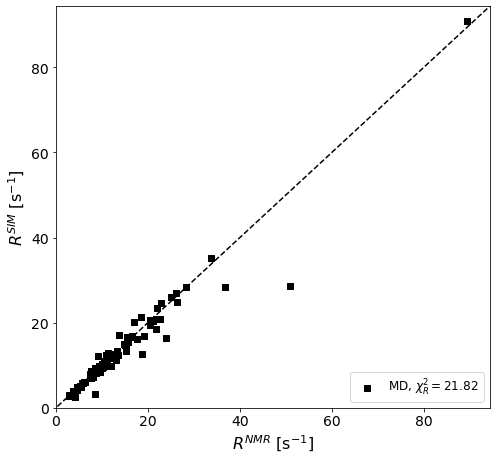

In [6]:
rw.plot_comparison( 0 )

We can now run the reweighting against rate 1 (`r=0`) using `reweight`.

In [7]:
print( aER.ABSURDer.reweight.__doc__ )


        Reweights the data with respect to a single rate r.
        It saves the results in a .pkl file.

        Parameters
        ----------
        r : int
            rate index.
        


In [8]:
rw.reweight( 0 )

# THETA: 100           
# Done! All minimizations terminated successfully
# Saved results.pkl


Let's take a look at the results of the reweighting. First, we plot the curve `phi_eff` vs `chi2` for each rate. 

In [10]:
print( absurder.ABSURDer.plot_phix2r.__doc__ )


        Plots the phi_eff vs reduced chi squared curve for a provided rate.

        Parameters
        ----------
        r : int
            rate index.
        outfig : str
            path to the figure to save. If not provided, the figure will be prompted on screen and not saved.
        


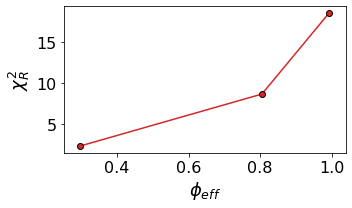

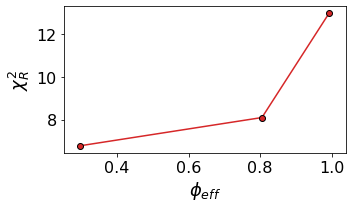

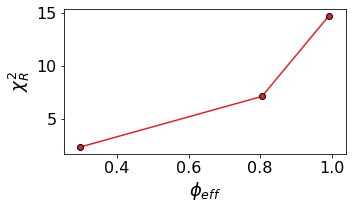

In [11]:
for i in range(3):
    rw.plot_phix2r( i )

Let us also take a look at how the scatter plot has changed now that the rates have been reweighted. Here we arbitrarily select `theta=100` as an optimal value of the fudge parameter for our reweighting. 

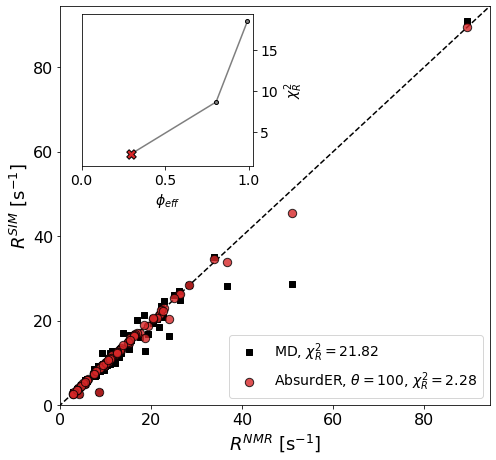

In [12]:
opt_theta = 100
rw.plot_comparison( 0, opt_theta )

In the case where we want to simply analyze some results without running any reweighting, we can construct the class and then run the `load_results` function. 

In [13]:
rw.load_results('results.pkl')

Alternatively to reweighting with respect to rate 1 we can also run the whole routine using `run`. In this case, the reweighting will be performed optimizing with respect to all rates separately and all rates simultaneously. 

In [15]:
print( absurder.ABSURDer.run.__doc__ )


        Runs reweighting for all the available rates.
        The name of the saved files will be the provided output name + '_R<num>'
        In the case of all the rates, <num> = a.
        


In [16]:
rw.run()

# All rates
# THETA: 100           
# Done! All minimizations terminated successfully
# Saved results_Ra.pkl

# Rate 0
# THETA: 100           
# Done! All minimizations terminated successfully
# Saved results_R1.pkl

# Rate 1
# THETA: 100           
# Done! All minimizations terminated successfully
# Saved results_R2.pkl

# Rate 2
# THETA: 100           
# Done! All minimizations terminated successfully
# Saved results_R3.pkl



Other advanced options that might come in handy for data analysis are:

In [4]:
print( absurder.ABSURDer.load_specdens.__doc__ )


        Loads into the class the files needed to plot the spectral densities

        Parameters
        ----------
        jex : str
            path to the pickle with the experimental spectral density functions.
        jws : int
            path to the pickle with the values of J(0), J(w) and J(2w).
        jmd : str
            path to the pickle with the simulated spectral density functions.
        


In [5]:
print( absurder.ABSURDer.plot_specdens.__doc__ )


        Plots the spectral density corresponding to a specific methyl

        Parameters
        ----------
        idx : int
            methyl group index.
        wd: float
            Larmor frequency of 2H at the used magnetic field strength in MHz (Ex. 145.858415 for 2H at 950 MHz magnetic field strength)
        opt_theta : int
            theta corresponding to the optimal set of weights. If not provided, no reweighted results will be shown.
            Default: None.
        methyl_name: str
            name of the methyl group, used as a figure title
        rate_labels : list
            list of labels to print on the x-axis. Is expected to be in a form similar to: [r'(D$_y$)]'. If not provided, a default label will be printed.
            Default: [].
        outfig : str
            path to the figure to save. If not provided, the figure will be prompted on screen and not saved.
            Default = None.
        


In [7]:
print( absurder.ABSURDer.load_rotamers.__doc__ )


        Loads into the class the files needed to plot the rotamer distributions

        Parameters
        ----------
        exrot : str
            path to the pickle with the experimental rotamer distributions.
        mdrot : int
            path to the pickle with the simulated rotamer distributions.
        ami : str
            path to the pickle with the amino acid employed in the calculation of the different rotamers.
        


In [8]:
print( absurder.ABSURDer.plot_rotamer_distributions.__doc__ )


        Plots the rotamer distributions for a given methyl group.

        Parameters
        ----------
        idx : str
            residue name and number (ex. ILE9).
        nblocks : int
            number of blocks employed in the calculation.
        block_size : int
            size of blocks in ps.
        ntrajs : int
            number of trajectories used to compute the rotamers.
        opt_theta : int
            theta corresponding to the optimal set of weights. If not provided, no reweighted results will be shown.
            Default: None.
        outfig : str
            path to the figure to save. If not provided, the figure will be prompted on screen and not saved.
            Default = None.
        


In [14]:
print( absurder.ABSURDer.plot_2d_rotamers.__doc__ )


        Plots the chi1-chi2 rotamer distribution for a given methyl group.

        Parameters
        ----------
        idx : str
            residue name and number (ex. ILE9).
        nblocks: int
            number of blocks employed in the calculation.
        block_size : int
            size of blocks in ps.
        opt_theta : int
            theta corresponding to the optimal set of weights. If not provided, no reweighted results will be shown.
        outfig : str
            path to the figure to save. If not provided, the figure will be prompted on screen and not saved.
            Default = None.
        


In [3]:
print( absurder.ABSURDer.plot_rate_distributions.__doc__ )


        Plots the rate distributions over the blocks for a given methyl group.

        Parameters
        ----------
        idx : int
            methyl group index.
        opt_theta : int
            theta corresponding to the optimal set of weights. If not provided, no reweighted results will be shown.
            Default: None.
        methyl_name: str
            name of the methyl group, used as a figure title
        rate_labels : list
            list of labels to print on the x-axis. Is expected to be in a form similar to: [r'(D$_y$)]'. If not provided, a default label will be printed.
            Default: [].
        outfig : str
            path to the figure to save. If not provided, the figure will be prompted on screen and not saved.
            Default = None.
        


Examples of use of advanced functions can be found at: `...`